In [1]:
!python --version

Python 3.7.12


**Julien VALENTIN**, **Décembre 2021**

In [2]:
from matplotlib import pyplot
import numpy

# A propos de l'équation de Langevin

- [Langevin's equation](https://en.wikipedia.org/wiki/Langevin_equation)

# Simulation par la méthode d'*Euler-Mayurama*

On commence par paramétrer notre modèle.

In [3]:
sigma = 1.
mu    = 10.
tau   = .05

Discrétisation de l'intervalle de temps.

In [4]:
dt = .001
T  = 1.
n  = int(T / dt)
t  = numpy.linspace(0., T, n)

On définit les variables transformées réduites.

In [5]:
sigma_bis = sigma * numpy.sqrt(2. / tau)
sqrtdt = numpy.sqrt(dt)

La solution $U_h$ est déclarée et initialisée à $0$.

In [6]:
Uh = numpy.zeros(n)

On implémente maintenant le schéma d'*Euler-Mayurama*.

In [7]:
for i in range(n - 1):
    Uh[i + 1] = Uh[i] + dt * (-(Uh[i] - mu) / tau) + sigma_bis * sqrtdt * numpy.random.randn()

Traçons la solution.

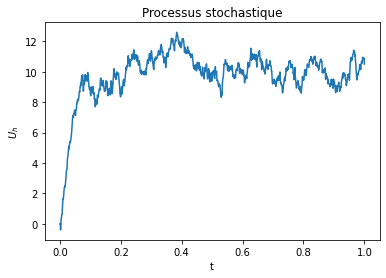

In [8]:
pyplot.plot(t, Uh)
pyplot.title("Processus stochastique")
pyplot.xlabel("t")
pyplot.ylabel(r"$U_h$")
pyplot.show()

# Méthode de *Milstein*

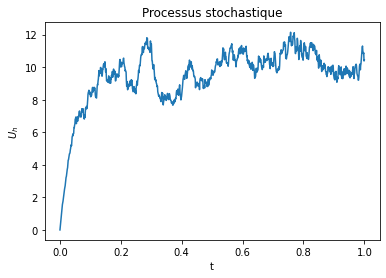

In [9]:
Uh = numpy.zeros(n)

for i in range(n - 1):
    Uh[i + 1] = Uh[i] + dt * (-(Uh[i] - mu) / tau) + sigma_bis * sqrtdt * numpy.random.normal(loc=0.0, scale=numpy.sqrt(dt)) + .5 * sigma_bis**2 * sqrtdt * Uh[i] * numpy.random.normal(loc=0.0, scale=numpy.sqrt(dt))

pyplot.plot(t, Uh)
pyplot.title("Processus stochastique")
pyplot.xlabel("t")
pyplot.ylabel(r"$U_h$")
pyplot.show()

# Méthode de *Runge-Kutta* pour les E.D.S